<a href="https://colab.research.google.com/github/kimyeseong984/-yolo-v8/blob/main/yolov8_train_segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 초기 환경 설정

In [1]:
# YOLOv8 설치
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
# 필요한 라이브러리 임포트
import os
from ultralytics import YOLO
import shutil
from google.colab import drive
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# 파일 선택기를 통한 업로드/ 학습된 zip 파일을 다운로드 한다.
uploaded = files.upload()

Saving Test.v2i.yolov8.zip to Test.v2i.yolov8.zip


In [4]:
# 코랩 셀에서 ! 를 앞에 붙여서 실행
!mkdir -p /content/dataset
!unzip /content/Test.v2i.yolov8.zip -d /content/dataset

Archive:  /content/Test.v2i.yolov8.zip
  inflating: /content/dataset/README.dataset.txt  
  inflating: /content/dataset/README.roboflow.txt  
  inflating: /content/dataset/data.yaml  
   creating: /content/dataset/train/
   creating: /content/dataset/train/images/
 extracting: /content/dataset/train/images/151-_jpg.rf.405ad85fe14d7f381b14f185aa8eeb20.jpg  
 extracting: /content/dataset/train/images/152-_jpg.rf.b66c958a5f586f0427d9ac2e9962073d.jpg  
 extracting: /content/dataset/train/images/153-_jpg.rf.c9ce8f6d8dbb2e34b85f103484e1996d.jpg  
 extracting: /content/dataset/train/images/154-_jpg.rf.7c6199789a00623779b4876b0d051ad8.jpg  
 extracting: /content/dataset/train/images/155-_jpg.rf.b8e4292d49f46ea193b1d13778439c10.jpg  
 extracting: /content/dataset/train/images/156-_jpg.rf.7bfcdedae99bff5ee325ddb4731748a5.jpg  
 extracting: /content/dataset/train/images/157-_jpg.rf.827f5a6ed4882a341d4c715534c48106.jpg  
 extracting: /content/dataset/train/images/158-_jpg.rf.d6003d3dcb282abd351eed

다음 폴더 구조를 수정합니다.


content/

├── dataset
│   ├──train
│   │   ├──images
│   │   ├──labels
│   ├──valid
│   │   ├──images
│   ├──test
│   │   ├──images
└── data.yaml





In [5]:
#test/images 폴더 생성
!mkdir -p /content/dataset/test/images
!cp /content/dataset/train/images/* /content/dataset/test/images/

In [6]:
#valid/images 폴더 생성
!mkdir -p /content/dataset/valid/images
!cp /content/dataset/train/images/* /content/dataset/valid/images/

In [7]:
#valid/labels 폴더 생성
!mkdir -p /content/dataset/valid/labels
!cp /content/dataset/train/labels/* /content/dataset/valid/labels/

#data.yaml 파일 수정

train: /content/dataset/train/images
val: /content/dataset/valid/images
test: /content/dataset/test/images

In [8]:
# 학습 시작
from ultralytics import YOLO

# Segmentation 모델로 학습
model = YOLO('yolov8l-seg.pt')  # segmentation 모델 사용

results = model.train(
    data='/content/dataset/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='yolov8_seg_custom',
    project='/content/runs/train',
    patience=10,
    save=True,
    device=0
)

100%|██████████| 88.1M/88.1M [00:00<00:00, 408MB/s]


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_seg_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, 

100%|██████████| 755k/755k [00:00<00:00, 36.0MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

  8                  -1  3   4461568  ultralytics.nn.modules.block.C2f             [512, 512, 3, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   4723712  ultralytics.nn.modules.block.C2f             [1024, 512, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  3   1247744  ultralytics.nn.modules.block.C2f             [768, 256, 3]                 
 16                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256,

100%|██████████| 5.35M/5.35M [00:00<00:00, 140MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 753.9±229.9 MB/s, size: 21.7 KB)


train: Scanning /content/dataset/train/labels... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<00:00, 1733.18it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 464.4±310.8 MB/s, size: 22.0 KB)


val: Scanning /content/dataset/valid/labels... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<00:00, 5558.31it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to /content/runs/train/yolov8_seg_custom/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/runs/train/yolov8_seg_custom
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.1G      1.731      4.806      3.598      1.669        199        640: 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         15        115      0.019      0.388     0.0348     0.0219      0.213     0.0271     0.0257     0.0163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.2G        1.7      4.695      3.635      1.703        211        640: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         15        115     0.0202      0.388     0.0366     0.0228    0.00959     0.0796     0.0273     0.0177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.1G      1.701      4.567      3.561      1.713        178        640: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         15        115     0.0187      0.369     0.0353      0.022       0.29     0.0237     0.0263     0.0169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.1G      1.804      4.792      3.581      1.702        216        640: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         15        115      0.019      0.359     0.0368     0.0224      0.367     0.0136     0.0275     0.0197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.2G      1.768       4.95      3.635      1.751        241        640: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         15        115     0.0185      0.327     0.0366     0.0221        0.4     0.0101     0.0278     0.0198



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.2G      1.578      4.989      3.546      1.591        206        640: 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         15        115     0.0183      0.342     0.0368     0.0221        0.6     0.0101     0.0279     0.0193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.2G      1.588      4.717      3.577      1.594        224        640: 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         15        115     0.0188      0.346     0.0388     0.0227        0.6     0.0101     0.0295     0.0191



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.1G      1.671      4.483      3.624      1.652        212        640: 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         15        115     0.0183      0.364     0.0383     0.0225        0.8    0.00994     0.0293     0.0193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.2G      1.726      4.926      3.607      1.715        210        640: 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         15        115      0.542      0.382      0.434      0.278      0.737      0.255      0.374       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.5G      1.112      2.893       2.29      1.344        215        640: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         15        115      0.673      0.519      0.587      0.424      0.634      0.505      0.535       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.6G     0.9887      1.899      2.031      1.253        222        640: 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         15        115      0.577      0.694      0.686      0.498      0.508      0.698      0.602      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.4G     0.9247       1.69      1.739      1.223        140        640: 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         15        115      0.652      0.548      0.672      0.433       0.67      0.559      0.669      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.4G     0.8756      1.469      1.584      1.219        165        640: 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         15        115      0.753      0.635      0.802      0.613      0.753      0.635      0.783      0.459



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.4G     0.9308      1.645      1.421      1.215        149        640: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         15        115      0.719      0.753      0.842      0.645      0.726      0.766      0.837      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.5G     0.7665      1.615      1.483       1.14        166        640: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         15        115      0.652       0.74      0.819        0.6      0.564      0.826      0.786      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.6G     0.8404      1.271      1.222      1.095        244        640: 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         15        115      0.562      0.838      0.781       0.59      0.544      0.762      0.688      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.5G     0.7515       1.15      1.171      1.094        211        640: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         15        115      0.696      0.766      0.793      0.594      0.649      0.745        0.7      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.4G     0.7896      1.097      1.105        1.1        178        640: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         15        115      0.696      0.766      0.793      0.594      0.649      0.745        0.7      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.6G     0.7328      1.006      1.048      1.055        202        640: 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         15        115      0.536      0.688      0.666      0.491      0.548      0.711       0.68      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.4G     0.7223      1.232      1.165      1.056        174        640: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         15        115      0.536      0.688      0.666      0.491      0.548      0.711       0.68      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.7G     0.7379     0.9851      1.092       1.06        208        640: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         15        115      0.593      0.746      0.757      0.603      0.593      0.746      0.735      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.5G     0.7162     0.9828      1.087      1.035        196        640: 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         15        115      0.593      0.746      0.757      0.603      0.593      0.746      0.735      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.7G      0.723      1.079      1.149      1.038        227        640: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         15        115      0.576      0.778      0.813       0.63      0.581       0.79      0.834      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.5G     0.6244     0.8522     0.8697      1.009        199        640: 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         15        115      0.576      0.778      0.813       0.63      0.581       0.79      0.834      0.501
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 14, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



24 epochs completed in 0.025 hours.
Optimizer stripped from /content/runs/train/yolov8_seg_custom/weights/last.pt, 92.3MB
Optimizer stripped from /content/runs/train/yolov8_seg_custom/weights/best.pt, 92.3MB

Validating /content/runs/train/yolov8_seg_custom/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l-seg summary (fused): 125 layers, 45,915,743 parameters, 0 gradients, 220.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


                   all         15        115      0.719      0.753      0.842      0.648      0.726      0.766      0.838      0.487
           dotted-line         15         59          1      0.599      0.921        0.7          1      0.599      0.917      0.562
             left_lane         15         15      0.858          1      0.995      0.668      0.858          1      0.995      0.528
             left_line         15         15      0.479      0.933      0.776      0.595      0.513          1      0.785      0.378
            right_lane         13         13      0.368      0.615       0.71      0.502      0.368      0.615      0.698      0.416
            right_line         13         13      0.892      0.615      0.809      0.773      0.892      0.615      0.795      0.551
Speed: 0.2ms preprocess, 23.1ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to /content/runs/train/yolov8_seg_custom


In [9]:
# 학습된 모델 로드(폴더에 맞도록)
model = YOLO('/content/runs/train/yolov8_seg_custom/weights/best.pt')

# 테스트 실행
results = model.predict(
    source='/content/dataset/test/images',  # 테스트 이미지 경로
    save=True,                              # 결과 저장
    save_txt=True,                          # 텍스트 결과도 저장
    conf=0.5,                               # 신뢰도 임계값
    project='/content/runs/detect',         # 저장 프로젝트 경로
    name='test_results'                     # 폴더 이름 지정
)


image 1/15 /content/dataset/test/images/151-_jpg.rf.405ad85fe14d7f381b14f185aa8eeb20.jpg: 640x640 3 dotted-lines, 3 left_lanes, 3 left_lines, 2 right_lanes, 2 right_lines, 76.1ms
image 2/15 /content/dataset/test/images/152-_jpg.rf.b66c958a5f586f0427d9ac2e9962073d.jpg: 640x640 3 dotted-lines, 2 left_lanes, 3 left_lines, 2 right_lanes, 1 right_line, 45.2ms
image 3/15 /content/dataset/test/images/153-_jpg.rf.c9ce8f6d8dbb2e34b85f103484e1996d.jpg: 640x640 4 dotted-lines, 4 left_lanes, 2 left_lines, 2 right_lanes, 2 right_lines, 45.8ms
image 4/15 /content/dataset/test/images/154-_jpg.rf.7c6199789a00623779b4876b0d051ad8.jpg: 640x640 4 dotted-lines, 3 left_lanes, 4 left_lines, 2 right_lanes, 2 right_lines, 45.7ms
image 5/15 /content/dataset/test/images/155-_jpg.rf.b8e4292d49f46ea193b1d13778439c10.jpg: 640x640 3 dotted-lines, 2 left_lanes, 2 left_lines, 2 right_lanes, 2 right_lines, 45.5ms
image 6/15 /content/dataset/test/images/156-_jpg.rf.7bfcdedae99bff5ee325ddb4731748a5.jpg: 640x640 4 dotte

In [10]:
import cv2

def draw_enhanced_results(image_path, results):
    """세그멘테이션 마스크를 이미지 위에 시각화"""
    # 이미지 로드
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 클래스 색상 정의
    class_names = ['dotted-line', 'left_lane', 'left_line', 'right_lane', 'right_line']
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255)]

    for result in results:
        masks = result.masks  # 마스크 객체

        if masks is not None and masks.data is not None:
            mask_data = masks.data.cpu().numpy()  # (N, H, W)
            cls_list = result.boxes.cls.cpu().numpy().astype(int)  # 클래스 인덱스 리스트
            conf_list = result.boxes.conf.cpu().numpy()  # 신뢰도

            for i in range(len(mask_data)):
                mask = mask_data[i]
                cls_id = cls_list[i]
                conf = conf_list[i]

                # 마스크 색상 및 클래스 이름
                color = colors[cls_id % len(colors)]
                class_name = class_names[cls_id] if cls_id < len(class_names) else f'class_{cls_id}'
                label = f'{class_name}: {conf:.2f}'

                # 마스크를 컬러로 적용
                colored_mask = np.zeros_like(img_rgb, dtype=np.uint8)
                for c in range(3):
                    colored_mask[:, :, c] = mask * color[c]

                # 반투명하게 overlay
                img_rgb = cv2.addWeighted(img_rgb, 1.0, colored_mask, 0.4, 0)

                # 마스크 경계 추출하여 텍스트 위치 추정
                contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                if contours:
                    x, y, w, h = cv2.boundingRect(contours[0])
                    # 라벨 텍스트
                    (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
                    cv2.rectangle(img_rgb, (x, y - text_height - 10), (x + text_width, y), color, -1)
                    cv2.putText(img_rgb, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    return img_rgb


Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


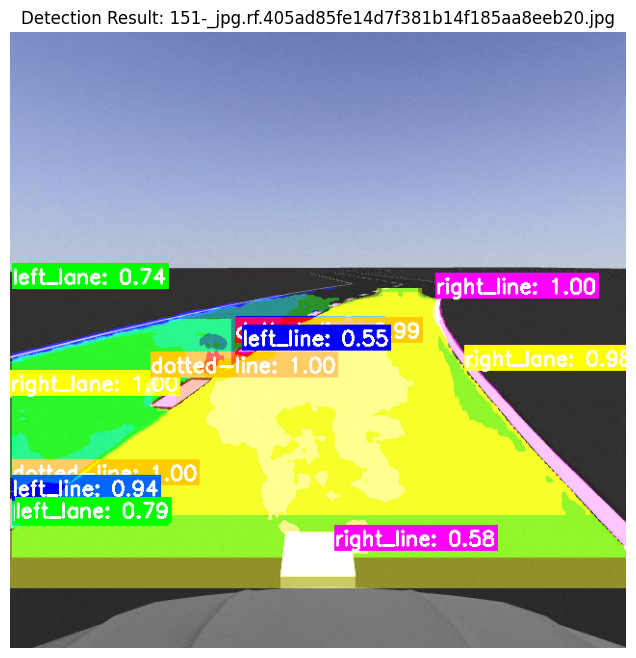

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


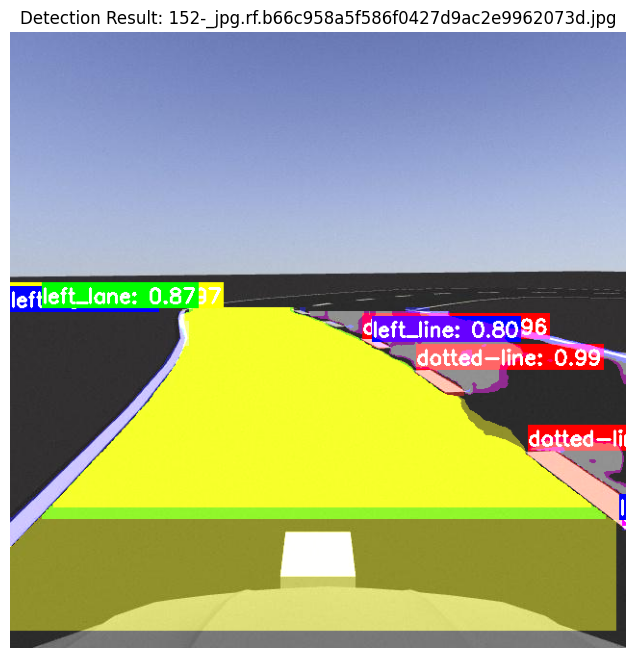

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


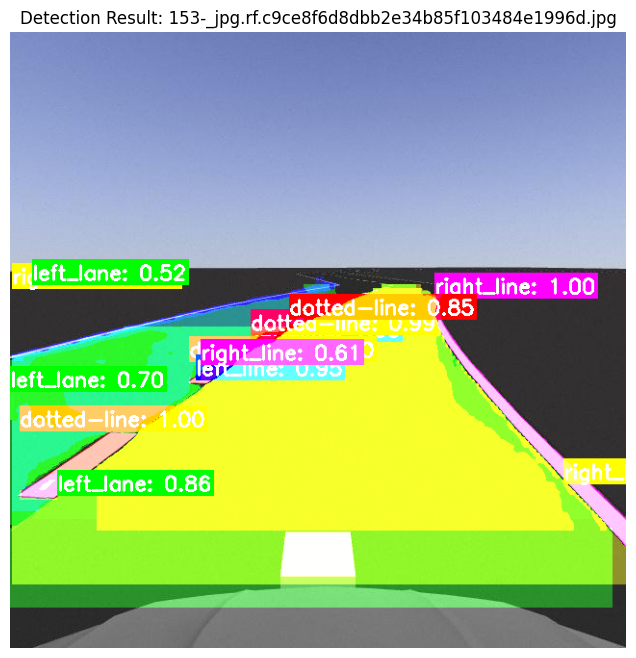

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


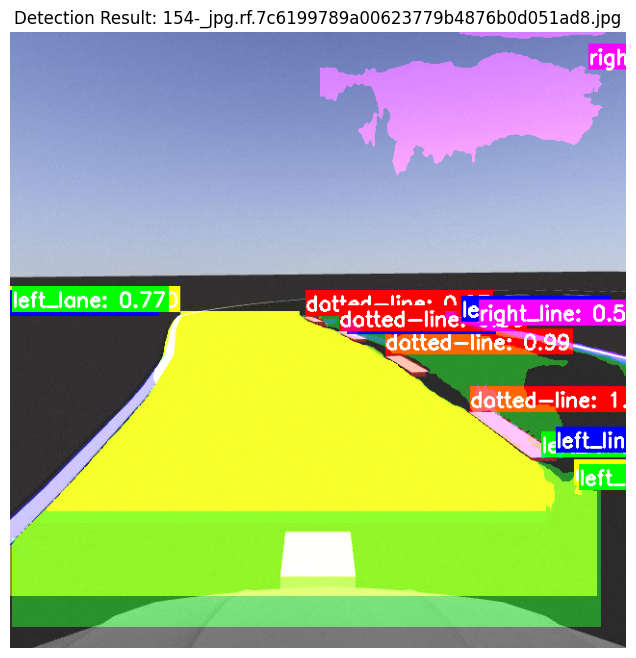

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


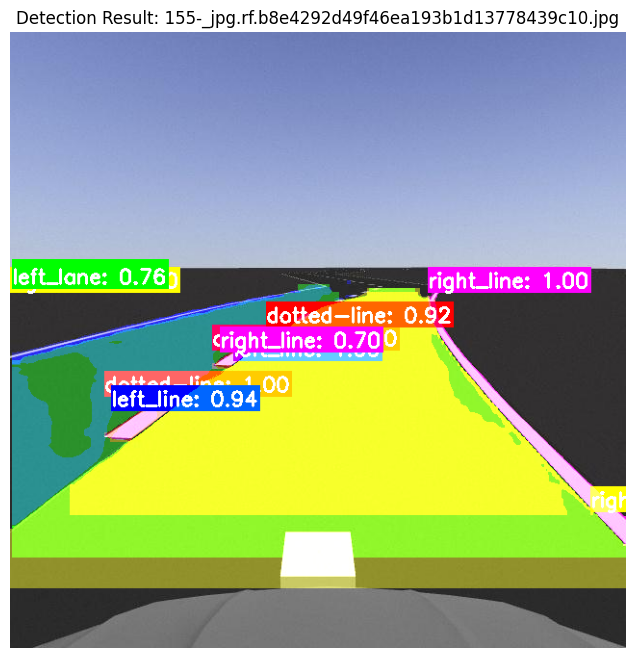

In [11]:
import matplotlib.pyplot as plt
import numpy as np

image_dir = '/content/dataset/test/images/'
test_images = sorted([img for img in os.listdir(image_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])


for i, img_name in enumerate(test_images[:5]):  # 처음 5개만
    img_path = f'/content/dataset/test/images/{img_name}'

    # 예측 실행
    result = model.predict(img_path, conf=0.5, verbose=False)

    # 향상된 시각화
    enhanced_img = draw_enhanced_results(img_path, result)

    # 결과 표시
    plt.figure(figsize=(12, 8))
    plt.imshow(enhanced_img)
    plt.title(f'Detection Result: {img_name}')
    plt.axis('off')
    plt.show()


In [12]:
import shutil
from google.colab import files

# 1. zip 파일로 압축 (기존 zip 파일이 있다면 덮어씌움)
shutil.make_archive('/content/runs_backup', 'zip', '/content/runs')

# 2. 다운로드 링크 제공
files.download('/content/runs_backup.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
#동영상으로 만들기

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# YOLO 예측 + 시각화 함수 (콜라보용)
image_dir = '/content/dataset/test/images/'
test_images = sorted([img for img in os.listdir(image_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])

frames = []

for i, img_name in enumerate(test_images[:5]):  # 처음 5개만
    img_path = os.path.join(image_dir, img_name)

    # 예측 실행
    result = model.predict(img_path, conf=0.5, verbose=False)

    # 향상된 시각화
    enhanced_img = draw_enhanced_results(img_path, result)

    # RGB -> BGR (OpenCV용)
    bgr_img = cv2.cvtColor(np.array(enhanced_img), cv2.COLOR_RGB2BGR)

    # 모든 프레임 사이즈를 동일하게 유지
    bgr_img = cv2.resize(bgr_img, (1280, 720))

    frames.append(bgr_img)

# 🔄 동영상 생성
video_path = "/content/detection_results.mp4"
fps = 2  # 0.5초 간격 = 2프레임/초
height, width, _ = frames[0].shape
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 코덱 설정

out = cv2.VideoWriter(video_path, fourcc, fps, (width, height))

for frame in frames:
    out.write(frame)

out.release()
print(f"✅ 영상 저장 완료: {video_path}")

# Colab에서 다운로드 링크 제공
from google.colab import files
files.download(video_path)


Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels
✅ 영상 저장 완료: /content/detection_results.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>